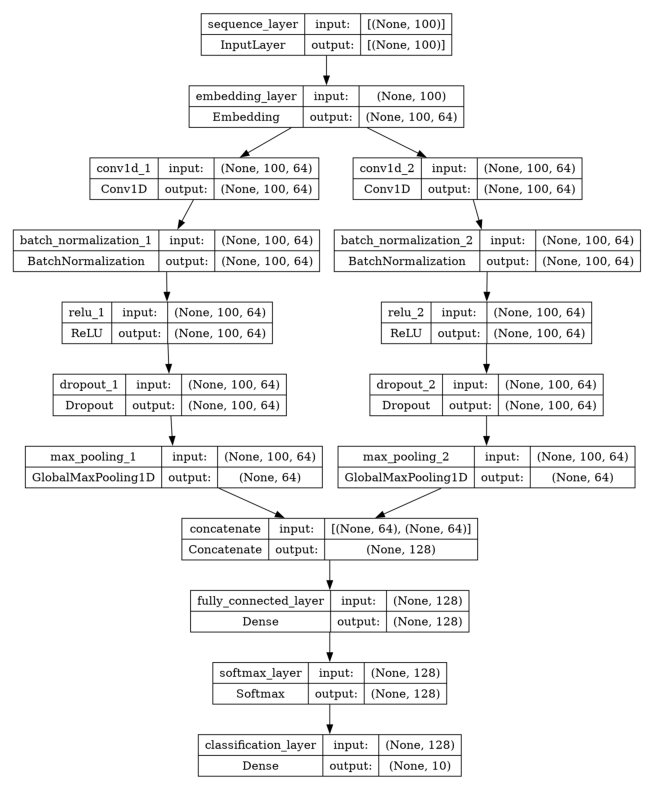

In [3]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Embedding, Conv1D, BatchNormalization, ReLU, Dropout, GlobalMaxPooling1D, Concatenate, Dense, Softmax
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt

# Define input shape
sequence_length = 100  # Adjust based on the dataset
input_shape = (sequence_length,)

# Vocabulary size for the Embedding layer
vocab_size = 10000  # Adjust based on the dataset

# Number of classes in the output layer
num_classes = 10  # Adjust based on the problem

# Create input layer
sequence_layer = Input(shape=input_shape, name='sequence_layer')

# Embedding layer
embedding_size = 64
embedding_layer = Embedding(input_dim=vocab_size, output_dim=embedding_size, name='embedding_layer')(sequence_layer)


branch_1 = Conv1D(filters=64, kernel_size=3, padding='same', name='conv1d_1')(embedding_layer)
branch_1 = BatchNormalization(name='batch_normalization_1')(branch_1)
branch_1 = ReLU(name='relu_1')(branch_1)
branch_1 = Dropout(0.2, name='dropout_1')(branch_1)
branch_1 = GlobalMaxPooling1D(name='max_pooling_1')(branch_1)


branch_2 = Conv1D(filters=64, kernel_size=5, padding='same', name='conv1d_2')(embedding_layer)
branch_2 = BatchNormalization(name='batch_normalization_2')(branch_2)
branch_2 = ReLU(name='relu_2')(branch_2)
branch_2 = Dropout(0.2, name='dropout_2')(branch_2)
branch_2 = GlobalMaxPooling1D(name='max_pooling_2')(branch_2)

# Concatenate branches
concatenated_branches = Concatenate(name='concatenate')([branch_1, branch_2])

# Fully connected layer
fully_connected_layer = Dense(128, activation='relu', name='fully_connected_layer')(concatenated_branches)

# Softmax layer
softmax_layer = Softmax(name='softmax_layer')(fully_connected_layer)

# Classification layer
classification_layer = Dense(num_classes, activation='softmax', name='classification_layer')(softmax_layer)

# Create model
model = tf.keras.Model(inputs=sequence_layer, outputs=classification_layer)

# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Save the model plot as an image
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True, rankdir='TB', dpi=150, expand_nested=True)

# Display the plot
img = plt.imread('model_plot.png')
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.axis('off')
plt.show()
